## News Sentiments



Your final Jupyter notebook must:

Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.
As final considerations:

Use the Matplotlib and Seaborn libraries.
Include a written description of three observable trends based on the data.
Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
Include an exported markdown version of your Notebook called README.md in your GitHub repository.


In [120]:
# Dependencies
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from datetime import datetime

from matplotlib.font_manager import FontProperties
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [171]:
target_user =("@BBC", "@CNN", "@CBS","@FoxNews", "@nytimes")

counter = 100

sentiments = pd.DataFrame(columns = ["Name","Tweet Count","Tweet","Compound Score", "Positive","Negative","Neutral","Date"])  #Empty Dataframe
                          
for target in target_user:
    #print(f"Tweets for {target}.")
    counter = 100
    for x in range(5):
        response = api.user_timeline(target, page=x)
    
        for tweet in range(20):
       
        # Get all tweets from home feed
           # public_tweets = api.user_timeline(target, page=x)
            tweets =response[tweet]["text"]
            name = response[tweet]["user"]["name"]
            date=response[tweet]["created_at"]
            #print(f"Tweet{counter}: {tweets}")
        #print(json.dumps(public_tweets, sort_keys=True, indent=4))
            results = analyzer.polarity_scores(tweets)
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            sentiments=sentiments.append({"Name":name, "Tweet":tweets, "Tweet Count": counter,
                                          "Compound Score": compound,"Positive":pos,
                                          "Negative":neg,"Neutral":neu,"Date":date}, ignore_index=True)              
           
            
            #print(f"tweet{counter}: {name}:{tweets} : {compound}")
            counter -=1
 




In [172]:
sentiments

,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
0,BBC,100,"Tonight, @WhisperingBob introduces highlights ...",0.0000,0.000,0.000,1.000,Sun Nov 19 21:35:04 +0000 2017
1,BBC,99,RT @BBCOne: Can’t type. Heart broken. 😫 #BlueP...,-0.4767,0.000,0.307,0.693,Sun Nov 19 21:12:12 +0000 2017
2,BBC,98,RT @BBCEarth: This turtle was rescued by the #...,0.2500,0.172,0.099,0.730,Sun Nov 19 21:05:41 +0000 2017
3,BBC,97,This is how Iceland got its young people to gi...,0.0000,0.000,0.000,1.000,Sun Nov 19 21:00:03 +0000 2017
4,BBC,96,How plastic is slowly killing our sea creature...,-0.6597,0.000,0.253,0.747,Sun Nov 19 20:55:23 +0000 2017
5,BBC,95,RT @BBCOne: Around 8 million tonnes of plastic...,-0.4019,0.000,0.114,0.886,Sun Nov 19 20:48:26 +0000 2017
6,BBC,94,Nine days at sea for one minute of TV. This is...,0.0000,0.000,0.000,1.000,Sun Nov 19 20:28:03 +0000 2017
7,BBC,93,RT @BBCOne: Hands up if you need to rest betwe...,0.0000,0.000,0.000,1.000,Sun Nov 19 20:11:08 +0000 2017
8,BBC,92,"'She, like all pop stars, must hunt to survive...",0.3612,0.128,0.000,0.872,Sun Nov 19 20:00:04 +0000 2017
9,BBC,91,"RT @BBCEarth: They rarely attack humans, they'...",0.3724,0.145,0.000,0.855,Sun Nov 19 19:59:53 +0000 2017


In [173]:
sentiments.to_csv("walsh_distingushing_sentiments.csv")

In [174]:
BBC = sentiments.loc[sentiments["Name"]== "BBC"]
BBC.head()

,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
0,BBC,100,"Tonight, @WhisperingBob introduces highlights ...",0.0000,0.000,0.000,1.000,Sun Nov 19 21:35:04 +0000 2017
1,BBC,99,RT @BBCOne: Can’t type. Heart broken. 😫 #BlueP...,-0.4767,0.000,0.307,0.693,Sun Nov 19 21:12:12 +0000 2017
2,BBC,98,RT @BBCEarth: This turtle was rescued by the #...,0.2500,0.172,0.099,0.730,Sun Nov 19 21:05:41 +0000 2017
3,BBC,97,This is how Iceland got its young people to gi...,0.0000,0.000,0.000,1.000,Sun Nov 19 21:00:03 +0000 2017
4,BBC,96,How plastic is slowly killing our sea creature...,-0.6597,0.000,0.253,0.747,Sun Nov 19 20:55:23 +0000 2017


In [175]:
BBC_avg_compound = BBC["Compound Score"].mean()
BBC_avg_compound

0.16459399999999999

In [176]:
CNN = sentiments.loc[sentiments["Name"]== "CNN"]
CNN.head()

,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
100,CNN,100,Jared Kushner's lawyer says the Senate Judicia...,0.0258,0.088,0.083,0.829,Mon Nov 20 02:38:41 +0000 2017
101,CNN,99,Afghan commandos rescue 15 people from a Talib...,0.0000,0.226,0.226,0.548,Mon Nov 20 02:20:49 +0000 2017
102,CNN,98,Sen. Al Franken has been cut from the TV broad...,0.2960,0.135,0.086,0.779,Mon Nov 20 02:02:33 +0000 2017
103,CNN,97,Fox News defends Sean Hannity amid calls for a...,-0.3182,0.000,0.173,0.827,Mon Nov 20 01:44:28 +0000 2017
104,CNN,96,A missing Argentine submarine attempted to con...,-0.1531,0.000,0.091,0.909,Mon Nov 20 01:20:39 +0000 2017


In [177]:
CNN_avg_compound = CNN["Compound Score"].mean()
CNN_avg_compound

-0.046797999999999999

In [178]:
CBS = sentiments.loc[sentiments["Name"]== "CBS"]
CBS.head()

,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
200,CBS,100,Due to football overrun #CBS is delayed 5 mins...,-0.2263,0.000,0.091,0.909,Mon Nov 20 00:41:54 +0000 2017
201,CBS,99,Get ready for football! Stream NFL on CBS toda...,0.4199,0.128,0.000,0.872,Sun Nov 19 14:53:05 +0000 2017
202,CBS,98,Stream the Kentucky Wildcats at Georgia Bulldo...,0.0000,0.000,0.000,1.000,Sat Nov 18 17:33:07 +0000 2017
203,CBS,97,Spread your wings and fly to Shanghai for a be...,0.0000,0.000,0.000,1.000,Thu Nov 16 20:49:50 +0000 2017
204,CBS,96,RT @latelateshow: Ready for new tunes? @zanelo...,0.4199,0.141,0.000,0.859,Thu Nov 16 01:00:45 +0000 2017


In [179]:
CBS_avg_compound = CBS["Compound Score"].mean()
CBS_avg_compound

0.21799000000000002

In [180]:
FOX = sentiments.loc[sentiments["Name"]== "Fox News"]
FOX.head()

,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
300,Fox News,100,".@TimRyan on GOP tax reform plans: ""A tax cut ...",0.2732,0.126,0.083,0.791,Mon Nov 20 02:35:38 +0000 2017
301,Fox News,99,.@MonicaCrowley on battle over working class v...,0.0516,0.144,0.134,0.722,Mon Nov 20 02:30:08 +0000 2017
302,Fox News,98,.@MonicaCrowley on battle for working class vo...,0.0258,0.121,0.117,0.762,Mon Nov 20 02:28:39 +0000 2017
303,Fox News,97,"Trump reignites feud with Flake, predicts he'l...",-0.7003,0.000,0.405,0.595,Mon Nov 20 02:24:18 +0000 2017
304,Fox News,96,North Korea on 'aggressive schedule' in develo...,-0.1531,0.000,0.118,0.882,Mon Nov 20 01:49:37 +0000 2017


In [181]:
FOX_avg_compound = FOX["Compound Score"].mean()
FOX_avg_compound

-0.02086399999999999

In [182]:
NYT = sentiments.loc[sentiments["Name"]== "The New York Times"]
NYT.head()


,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
400,The New York Times,100,"Celebrating a 25-Year-Old Clinton Win, but Sti...",-0.1698,0.261,0.243,0.495,Mon Nov 20 02:35:24 +0000 2017
401,The New York Times,99,"“My children respect and love her so much, and...",0.8074,0.327,0.000,0.673,Mon Nov 20 02:26:35 +0000 2017
402,The New York Times,98,An Earth-sized planet about 11 light-years fro...,0.4767,0.154,0.000,0.846,Mon Nov 20 02:08:02 +0000 2017
403,The New York Times,97,Does your iPhone feel slower after Apple relea...,0.0000,0.000,0.000,1.000,Mon Nov 20 01:49:54 +0000 2017
404,The New York Times,96,Ohio Lawmaker Who Backed Family Values Resigns...,0.1280,0.270,0.163,0.567,Mon Nov 20 01:30:48 +0000 2017


In [183]:
NYT_avg_compound = NYT["Compound Score"].mean()
NYT_avg_compound

0.006867999999999993

In [184]:
compound_avg = [{"BBC": BBC_avg_compound,"CNN":CNN_avg_compound,
                "CBS":CBS_avg_compound,"FOX":CBS_avg_compound,
                "NYT":NYT_avg_compound}]
overall_sentiment = pd.DataFrame(compound_avg)
overall_sentiment

,BBC,CBS,CNN,FOX,NYT
0,0.164594,0.21799,-0.046798,0.21799,0.006868


In [185]:
# Obtain the x and y coordinates for each of the three city types
BBC_compound = BBC["Compound Score"]
BBC_tweetcount = BBC["Tweet Count"] 

CNN_compound = CNN["Compound Score"]
CNN_tweetcount = CNN["Tweet Count"] 
                     
CBS_compound = CBS["Compound Score"]
CBS_tweetcount =CBS["Tweet Count"] 
                     
FOX_compound = FOX["Compound Score"]
FOX_tweetcount = FOX["Tweet Count"] 

NYT_compound = NYT["Compound Score"]
NYT_tweetcount = NYT["Tweet Count"] 

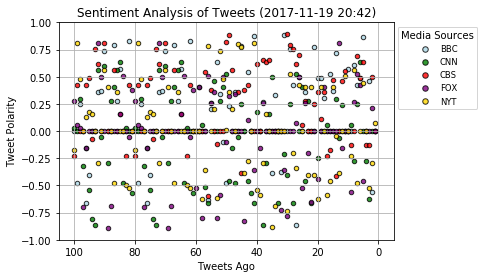

In [187]:
# Build the scatter plots for each city types


plt.scatter(BBC_tweetcount,
            BBC_compound,
            s=20, c="lightblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="BBC")

plt.scatter(CNN_tweetcount, 
            CNN_compound, 
            s=20, c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CNN")

plt.scatter(CBS_tweetcount, 
            CBS_compound, 
            s=20, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CBS")

plt.scatter(FOX_tweetcount, 
            FOX_compound, 
            s=20, c="purple", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="FOX")


plt.scatter(NYT_tweetcount, 
            NYT_compound, 
            s=20, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="NYT")

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({})".format(now))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim((105,-5))
plt.ylim((-1,1))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title ="Media Sources", 
                  labelspacing=0.5, bbox_to_anchor=(1, 1))

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]


# Incorporate a text label regarding circle size
#plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Media.png")

# Show plot
plt.show()

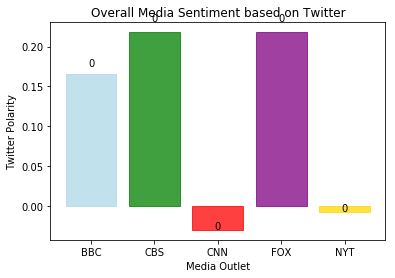

In [188]:
media_group =["BBC","CBS","CNN","FOX","NYT"]
compound = [0.165,0.218,-0.030,0.218,-0.008]

plt.title("Overall Media Sentiment based on Twitter")
plt.xlabel("Media Outlet")
plt.ylabel("Twitter Polarity")

#plt.xlim(-0.25, len(gyms))
#plt.ylim(0, max(members) + 5)
#overall_sentiment.plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
barlist = plt.bar(media_group, compound,alpha=0.75, align="center")
barlist[0].set_color('lightblue')
barlist[1].set_color('green')
barlist[2].set_color('red')
barlist[3].set_color('purple')
barlist[4].set_color('gold')

def autolabel(barlist):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in barlist:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(barlist)


#plt.xticks(tick_locations, gyms)
plt.show()